In [55]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/av-healthcare-analytics-ii/healthcare/train_data.csv')
#showing the dataset
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


# Missing Values

In [4]:
#checking for null values in the dataset
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
#ascribing missing values
def impute_missing_values(df,columns):
    for column in columns:
        df[column]=df[column].fillna(df[column].mean())
        

In [11]:
#applying the function to the column with missing values
impute_columns=['Bed Grade','City_Code_Patient']
impute_missing_values(df,impute_columns)

In [10]:
#again checking missing values
df.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [12]:
#checking for datatype
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [16]:
#creating a function to filtering categorical column from dataset
def get_categorical_unique(df):
    #looping throug the column and storing it in a list if its datatype is object
    categorical_columns=[column for column in df.dtypes.index if df.dtypes[column]=='object']
    #after saving to a list if the column object the saving it in a dictionary 
    #with column name as keys and its unique values as values
    categorical_uniques={column: df[column].unique() for column in categorical_columns}
    #returning the dataframe
    return categorical_uniques
    

In [17]:
#applying get_categorical_unique function to the dataset
get_categorical_unique(df)

{'Hospital_type_code': array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object),
 'Hospital_region_code': array(['Z', 'X', 'Y'], dtype=object),
 'Department': array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
        'surgery'], dtype=object),
 'Ward_Type': array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object),
 'Ward_Facility_Code': array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),
 'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [13]:
df.dtypes.index

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [20]:
#storing the onehot encoding types column in a list
onehot_columns=['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code']

In [22]:
#creating a function to onehot encode columns
def onehot_encode(df,columns):
    #looping through columns
    for column in columns:
        #creating the dummy list and storing it in a variable
        dummies=pd.get_dummies(df[column])
        #concating to the original dataset
        df=pd.concat([df,dummies],axis=1)
        #dropping the column from the dataset
        df.drop(column,axis=1,inplace=True)
    return df

In [23]:
df=onehot_encode(df,onehot_columns)

In [25]:
df

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,R,S,T,U,A,B,C,D,E,F
0,1,8,3,3,2.0,31397,7.0,Emergency,Extreme,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,0,1,0
3,4,26,2,2,2.0,31397,7.0,Trauma,Extreme,2,...,1,0,0,0,0,0,0,1,0,0
4,5,26,2,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,6,3,4.0,86499,23.0,Emergency,Moderate,3,...,0,0,0,0,0,0,0,0,0,1
318434,318435,24,1,2,4.0,325,8.0,Urgent,Moderate,4,...,0,0,0,0,0,0,0,0,1,0
318435,318436,7,4,3,4.0,125235,10.0,Emergency,Minor,3,...,1,0,0,0,0,0,0,0,0,1
318436,318437,11,2,3,3.0,91081,8.0,Trauma,Minor,5,...,0,0,0,0,0,0,0,1,0,0


In [27]:
sorted([-2,-7,1])

[-7, -2, 1]

In [ ]:
for column in categorical_uniques:
    

In [32]:
categorical_uniques=get_categorical_unique(df)

In [33]:
categorical_uniques

{'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [34]:
#looping through the column
for column in categorical_uniques:
    #sorted the value of in key value pairs
    categorical_uniques[column]=sorted(categorical_uniques[column])

In [35]:
categorical_uniques

{'Type of Admission': ['Emergency', 'Trauma', 'Urgent'],
 'Severity of Illness': ['Extreme', 'Minor', 'Moderate'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

In [39]:
unique_list=categorical_uniques['Type of Admission']
unique_list.insert(0,unique_list.pop(unique_list.index('Urgent')))
unique_list.insert(0,unique_list.pop(unique_list.index('Trauma')))


unique_list=categorical_uniques['Severity of Illness']
unique_list.insert(0,unique_list.pop(unique_list.index('Moderate')))
unique_list.insert(0,unique_list.pop(unique_list.index('Minor')))


In [40]:
categorical_uniques

{'Type of Admission': ['Trauma', 'Urgent', 'Emergency'],
 'Severity of Illness': ['Minor', 'Moderate', 'Extreme'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

In [41]:
stay_mappings={value:index for index,value in enumerate(categorical_uniques['Stay'])}

In [42]:
stay_mappings

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

In [48]:
#creating a function
def ordinal_unique(df,uniques):
    #looping through the columns
    for column in uniques:
        #replacing the values with their index value
        df[column]=df[column].apply(lambda x:uniques[column].index(x))
        

In [45]:
ordinal_unique(df,categorical_uniques)

In [46]:
df['Stay']

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [47]:
df

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,R,S,T,U,A,B,C,D,E,F
0,1,8,3,3,2.0,31397,7.0,2,2,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,1,0
3,4,26,2,2,2.0,31397,7.0,0,2,2,...,1,0,0,0,0,0,0,1,0,0
4,5,26,2,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,6,3,4.0,86499,23.0,2,1,3,...,0,0,0,0,0,0,0,0,0,1
318434,318435,24,1,2,4.0,325,8.0,1,1,4,...,0,0,0,0,0,0,0,0,1,0
318435,318436,7,4,3,4.0,125235,10.0,2,0,3,...,1,0,0,0,0,0,0,0,0,1
318436,318437,11,2,3,3.0,91081,8.0,0,0,5,...,0,0,0,0,0,0,0,1,0,0


In [49]:
df

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,R,S,T,U,A,B,C,D,E,F
0,1,8,3,3,2.0,31397,7.0,2,2,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,0,1,0
3,4,26,2,2,2.0,31397,7.0,0,2,2,...,1,0,0,0,0,0,0,1,0,0
4,5,26,2,2,2.0,31397,7.0,0,2,2,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,6,3,4.0,86499,23.0,2,1,3,...,0,0,0,0,0,0,0,0,0,1
318434,318435,24,1,2,4.0,325,8.0,1,1,4,...,0,0,0,0,0,0,0,0,1,0
318435,318436,7,4,3,4.0,125235,10.0,2,0,3,...,1,0,0,0,0,0,0,0,0,1
318436,318437,11,2,3,3.0,91081,8.0,0,0,5,...,0,0,0,0,0,0,0,1,0,0


In [50]:
df.dtypes

case_id                                int64
Hospital_code                          int64
City_Code_Hospital                     int64
Available Extra Rooms in Hospital      int64
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                      int64
Severity of Illness                    int64
Visitors with Patient                  int64
Age                                    int64
Admission_Deposit                    float64
Stay                                   int64
a                                      uint8
b                                      uint8
c                                      uint8
d                                      uint8
e                                      uint8
f                                      uint8
g                                      uint8
X                                      uint8
Y                                      uint8
Z         

In [66]:
#scaling the data
y=df['Stay']
x=df.drop('Stay',axis=1)

In [59]:
df=df.set_index('case_id')

In [62]:
x

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,R,S,T,U,A,B,C,D,E,F
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,2,2,5,...,1,0,0,0,0,0,0,0,0,1
2,2,5,2,2.0,31397,7.0,0,2,2,5,...,0,1,0,0,0,0,0,0,0,1
3,10,1,2,2.0,31397,7.0,0,2,2,5,...,0,1,0,0,0,0,0,0,1,0
4,26,2,2,2.0,31397,7.0,0,2,2,5,...,1,0,0,0,0,0,0,1,0,0
5,26,2,2,2.0,31397,7.0,0,2,2,5,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,6,3,4.0,86499,23.0,2,1,3,4,...,0,0,0,0,0,0,0,0,0,1
318435,24,1,2,4.0,325,8.0,1,1,4,8,...,0,0,0,0,0,0,0,0,1,0
318436,7,4,3,4.0,125235,10.0,2,0,3,7,...,1,0,0,0,0,0,0,0,0,1


In [57]:
x=x.set_index('case_id')

In [58]:
x

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,R,S,T,U,A,B,C,D,E,F
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,3,3,2.0,31397,7.0,2,2,2,5,...,1,0,0,0,0,0,0,0,0,1
2,2,5,2,2.0,31397,7.0,0,2,2,5,...,0,1,0,0,0,0,0,0,0,1
3,10,1,2,2.0,31397,7.0,0,2,2,5,...,0,1,0,0,0,0,0,0,1,0
4,26,2,2,2.0,31397,7.0,0,2,2,5,...,1,0,0,0,0,0,0,1,0,0
5,26,2,2,2.0,31397,7.0,0,2,2,5,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,6,3,4.0,86499,23.0,2,1,3,4,...,0,0,0,0,0,0,0,0,0,1
318435,24,1,2,4.0,325,8.0,1,1,4,8,...,0,0,0,0,0,0,0,0,1,0
318436,7,4,3,4.0,125235,10.0,2,0,3,7,...,1,0,0,0,0,0,0,0,0,1


In [67]:
#scaling the data
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),index=x.index,columns=x.columns)

In [64]:
x

array([[-1.19517603, -0.57105545, -0.16917678, ..., -0.44080744,
        -0.45868342,  1.35063269],
       [-1.89012389,  0.07357963, -1.02521686, ..., -0.44080744,
        -0.45868342,  1.35063269],
       [-0.96352675, -1.21569054, -1.02521686, ..., -0.44080744,
         2.18015293, -0.74039375],
       ...,
       [-1.31100068, -0.24873791, -0.16917678, ..., -0.44080744,
        -0.45868342,  1.35063269],
       [-0.84770211, -0.89337299, -0.16917678, ...,  2.26856427,
        -0.45868342, -0.74039375],
       [ 0.07889503,  0.71821472,  1.5429034 , ..., -0.44080744,
        -0.45868342, -0.74039375]])

In [68]:
#training
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(254750, 38)
(63688, 38)
(254750,)
(63688,)


In [81]:
y.unique()

array([ 0,  4,  3,  1,  5,  2,  7, 10,  8,  6,  9])

In [70]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [71]:
log_model.score(x_test,y_test)

0.38924130134405227

In [75]:
#tensorflow
inputs=tf.keras.Input(shape=(38,))
x=tf.keras.layers.Dense(16,activation='relu')(inputs)
x-tf.keras.layers.Dense(16,activation='relu')(inputs)
outputs=tf.keras.layers.Dense(11,activation='softmax')(x)

2022-12-20 06:21:08.061804: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [85]:
nm_model=tf.keras.Model(inputs=inputs,outputs=outputs)

In [87]:
nm_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [89]:
batch_size=32
epochs=10
history=nm_model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,
                    epochs=epochs)

2022-12-20 06:24:43.867132: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
6369/6369 [==============================] - 14s 2ms/step - loss: 1.6702 - accuracy: 0.3718 - val_loss: 1.5970 - val_accuracy: 0.3965
Epoch 2/10
6369/6369 [==============================] - 14s 2ms/step - loss: 1.5938 - accuracy: 0.3979 - val_loss: 1.5844 - val_accuracy: 0.4023
Epoch 3/10
6369/6369 [==============================] - 14s 2ms/step - loss: 1.5855 - accuracy: 0.3999 - val_loss: 1.5782 - val_accuracy: 0.4023
Epoch 4/10
6369/6369 [==============================] - 15s 2ms/step - loss: 1.5799 - accuracy: 0.4015 - val_loss: 1.5742 - val_accuracy: 0.4012
Epoch 5/10
6369/6369 [==============================] - 14s 2ms/step - loss: 1.5758 - accuracy: 0.4011 - val_loss: 1.5699 - val_accuracy: 0.4046
Epoch 6/10
6369/6369 [==============================] - 14s 2ms/step - loss: 1.5723 - accuracy: 0.4018 - val_loss: 1.5659 - val_accuracy: 0.4037
Epoch 7/10
6369/6369 [==============================] - 14s 2ms/step - loss: 1.5696 - accuracy: 0.4019 - val_loss: 1.5634 - val_ac

In [90]:
print('Neural Network Accuracy',nm_model.evaluate(x_test,y_test))

1991/1991 [==============================] - 3s 1ms/step - loss: 1.5682 - accuracy: 0.4015
Neural Network Accuracy [1.568205714225769, 0.40153560042381287]


In [92]:
print('Logistic Regression',log_model.score(x_test,y_test))

Logistic Regression 0.38924130134405227


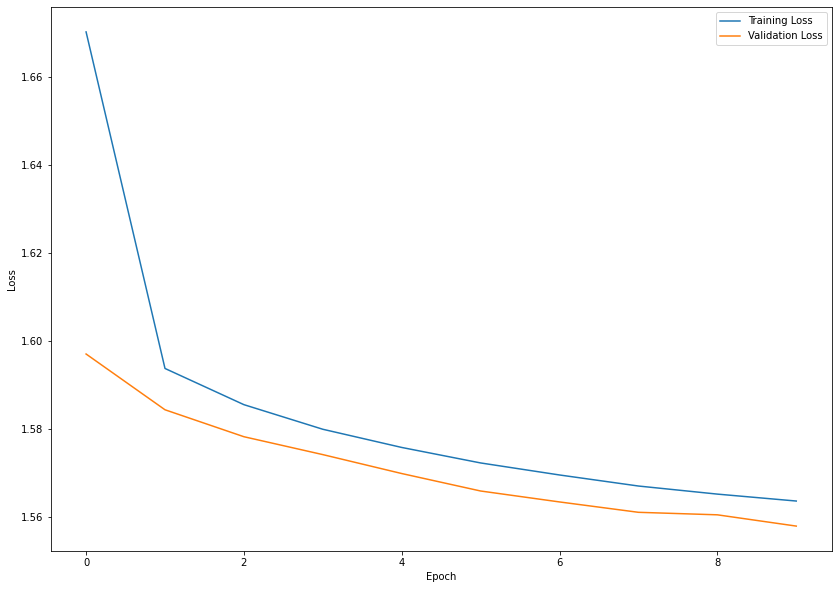

In [94]:
#plotting the figure
plt.figure(figsize=(14,10))
plt.plot(range(epochs),history.history['loss'],label='Training Loss')
plt.plot(range(epochs),history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()